#questions 

#Define the problem:
the problem is how predict the label of the text or post if is fake news or not


#What is the input?
the input is text that has a about 60000 rows have fake news and right news in addition to some injected noise needed to be cleaned


#What is the output?
predict the label of the news if they are fake news or True news


#What data mining function is required?
classification problem


#What could be the challenges?
the challenges are to get a cleaned text data by Preprocessing techniques in NLP to extract a pure sentence to predict correctly and choose best classifier for this mission.


#What is the impact?
detect fake news to try to stop spreading it.


#What is an ideal solution?
getting high accuracy for predict which fake or true news,and which model perfect to train input text (NLP or text classification) in this proplem the best model is logestic regresion according to my trials


#What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue?

1- Character n-grams and word n-grams are two types of language models used in natural language processing applications.
In word n-grams, the text is split into sequences of words of length n.
In character n-grams, the text is split into sequences of characters of length n.

2-On the other hand, word n-grams tend to suffer more from the OOV issue because they rely on exact word matches. If the model encounters a word that it has not seen before, it cannot generate a meaningful representation for it, and the model's performance may suffer as a result.


#What is the difference between stop word removal and stemming? Are these techniques language-dependent?

1-Stop word removal involves removing common words that don't carry much meaning, such as "the", "a", "an", "and", "is", "of", etc., from the text before further processing. The rationale behind this technique is that these words don't contribute much to the meaning of a sentence and can be safely removed without affecting the overall understanding of the text.
on the other hand, stemming, on the other hand, involves reducing words to their base or root form, by removing suffixes and prefixes. For example, the words "running", "runs", and "ran" would all be reduced to "run". The aim of stemming is to reduce the dimensionality of the feature space and to group together words that have similar meanings.

2-yes, both stop word removal and stemming are language-dependent techniques. Stop words can vary between languages, as different languages have different sets of common words that can be safely removed. Similarly, the rules for stemming can vary between languages, as different languages have different morphological structures.


#Is tokenization techniques language dependent? Why?
yes,  tokenization techniques are language dependent because they need to take into account the specific rules and patterns of each language to accurately split text into individual tokens. This requires an understanding of the linguistic structure and conventions of each language, and the development of language-specific algorithms and tools to tokenize text effectively.


#What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?
Count vectorizer creates a matrix where each row represents a document and each column represents a term in the vocabulary. The matrix contains the count of how many times each term appears in each document. this approach doesn't take into account the relative importance of each term within the document or across the corpus. TF-IDF vectorizer, on the other hand, creates a matrix where each row represents a document and each column represents a term in the vocabulary. The matrix contains the TF-IDF score of each term in each document, which is a measure of the term's importance within the document and across the corpus.

In terms of selecting n-grams, it is not feasible to use all possible n-grams, especially for larger values of n, as this would result in a very high-dimensional feature space and may lead to overfitting. Instead, a subset of n-grams can be selected based on their frequency and relevance to the task at hand.

#preprocessing and visualization

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, PredefinedSplit
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
!pip install scikit-optimize
from skopt import BayesSearchCV

In [ ]:
#download punkt pakages from nltk library
nltk.download('punkt')
#download stopwords pakages from nltk library
nltk.download('stopwords')
#download wordnet pakages from nltk library
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#read the training data
df = pd.read_csv('xy_train.csv')

In [ ]:
#display the first five rows 
df.head()

,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0


In [ ]:
#display the dimension of the data
df.shape

(60000, 3)

In [ ]:
#drop duplicates but not found any duplicated rows
df = df.drop_duplicates()
df.shape

(60000, 3)

In [ ]:
#check null values
print(df.isna().sum().sort_values())

id       0
text     0
label    0
dtype: int64


In [ ]:
# some simple transformation (always make a copy before assigning)
df2 = df.copy()

In [ ]:
#drop id column
df = df.drop(['id'],axis=1)

In [ ]:
#check number of classes in the label
df.nunique()

text     59645
label        3
dtype: int64

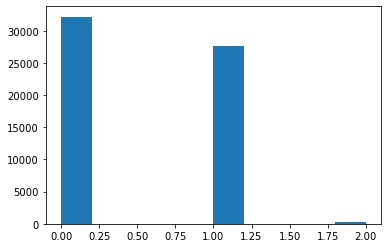

In [ ]:
#show target classes 
plt.hist(df['label'])
plt.show()

As show in the above figure there are label equal=2 and our label 0 or 1 only so i will drop it 

In [ ]:
#removing noisy data (label = 2) at label
df = df[(df.label == 0) | (df.label == 1)]

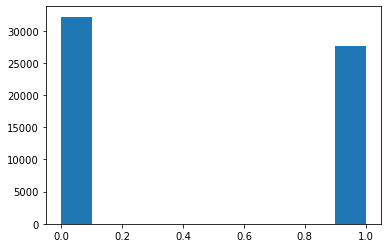

In [ ]:
#check balance of data after drop rows have value 2
plt.hist(df['label'])
plt.show()

As shown that the two classes are almost balanced

In [ ]:
#check dimension of the data after dropping label 2
df.shape

(59768, 2)

In [ ]:
# call stemmer and stop wrods
stemmer = SnowballStemmer(language='english')
stop_words = set(stopwords.words("english"))

By using stemmers and stop words, we can improve the accuracy and efficiency of text analysis algorithms, reduce the dimensionality of the feature space, and make the analysis more robust to variations in the text.

**steps to clean the text:**

convert all whitespaces (tabs etc.) to single wspace

all lowercase

remove stopwords, punctuation and stemm

Keep only ASCII + European Chars and whitespace, no digits

remove any html tags (< /br> often found)

In [ ]:
#define a function to clean the tex
def text_clean(text,for_embedding=True):#I will apply embedding 
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)    
    text = text.lower()
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:#apply stemmer
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [ ]:
#apply the text cleaning function on on the text column
df['text'] = df['text'].apply(text_clean)

In [ ]:
#print the first five rows after clearning
df.head()

,text,label
0,group of friends began to volunteer at homeles...,0
1,british prime minister theresa may on nerve at...,0
2,"in , goodyear released kit that allows ps to b...",0
3,"happy birthday , bob barker ! the price is rig...",0
4,obama to nation innocent cops and unarmed youn...,0


In [ ]:
#assign the text to X and target label to y
X = df['text']
y = df['label']

#first trial

In [ ]:
pipe_xgb =  Pipeline([("vectorizer",TfidfVectorizer(analyzer="word", max_df=0.6, min_df=10, ngram_range=(1, 2))),
                      ("xgb", XGBClassifier())])
params = {
          'xgb__n_estimators': [700,800,900],
          'xgb__max_depth':[9,10,11],
          'xgb__learning_rate' :[0.01,0.02]
          }
random_search  = RandomizedSearchCV(
    pipe_xgb, params, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X and y
random_search.fit(X,y)
#print best score
print(f'Best_score = {random_search.best_score_}')
#print best Params
print(f'Best_params = {random_search.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 73.5min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed: 80.7min finished


Best_score = 0.8455405578791154
Best_params = {'xgb__n_estimators': 800, 'xgb__max_depth': 11, 'xgb__learning_rate': 0.02}


observations

in this trial I used TFIDF(word), XGBClassifier Model and used random search for tuning hyperparameters and it consumed about one hour and the best were ['model__learning_rate': 0.02, 'model__max_depth': 11, 'model__n_estimators': 800] I used  cross validation set cv=5 it was found that: best score 0.8455
score on leaderboard 0.81223 Public

#second trial

In [ ]:
pipe_xgb =  Pipeline([("vectorizer",TfidfVectorizer(analyzer="word", max_df=0.6, min_df=10, ngram_range=(1, 2))),
                      ("randm_forest", RandomForestClassifier())])
params = {
          'randm_forest__n_estimators': [700,800,900],
          'randm_forest__max_depth':[10,20,30]
          }
random_search  = RandomizedSearchCV(
    pipe_xgb, params, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X and y
random_search.fit(X,y)
#print best score
print(f'Best_score = {random_search.best_score_}')
#print best Params
print(f'Best_params = {random_search.best_params_}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed: 10.7min finished


Best_score = 0.830329379594895
Best_params = {'randm_forest__n_estimators': 900, 'randm_forest__max_depth': 30}


observations

in this trial I used TFIDF(word), RandomForestClassifier Model and used random search for tuning hyperparameters and it consumed about half hour and the best were ['model__max_depth': 30, 'model__n_estimators': 900] I used cross validation set cv=5 it was found that: best score 0.8303
score on leaderboard 0.81988 Public

#third trial

In [ ]:
pipe_xgb =  Pipeline([("vectorizer",TfidfVectorizer(analyzer="word", max_df=0.6, min_df=10, ngram_range=(1, 2))),
                      ("log_reg", LogisticRegression())])
params = {
          'log_reg__penalty': ['l2'],
          'log_reg__C' : [0.6,0.9,1,1.3,1.4,1.6],
          'log_reg__class_weight': ['balanced',None],
          'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
random_search  = RandomizedSearchCV(
    pipe_xgb, params, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X and y
random_search.fit(X,y)
#print best score
print(f'Best_score = {random_search.best_score_}')
#print best Params
print(f'Best_params = {random_search.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  1.3min finished


Best_score = 0.8871007259119235
Best_params = {'log_reg__solver': 'newton-cg', 'log_reg__penalty': 'l2', 'log_reg__class_weight': 'balanced', 'log_reg__C': 1.6}


observations

in this trial I used TFIDF(word), LogisticRegression Model and used random search for tuning hyperparameters and it consumed about half hour and the best were ['log_reg__solver': newton-cg, 'log_reg__penalty': 'l2','log_reg__class_weight': 'balanced', 'log_reg__C': 1.6] I used cross validation set cv=5 it was found that: best score 0.8871
score on leaderboard 0.86019 Public

#fourth trial

In [ ]:
pipe_xgb =  Pipeline([("vectorizer",TfidfVectorizer(analyzer="char", max_df=0.6, min_df=10, ngram_range=(3, 5))),
                      ("log_reg", LogisticRegression())])
params = {
          'log_reg__penalty': ['l2'],
          'log_reg__C' : [0.6,0.9,1,1.3,1.4,1.6],
          'log_reg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }
random_search  = RandomizedSearchCV(
    pipe_xgb, params, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X and y
random_search.fit(X,y)
#print best score
print(f'Best_score = {random_search.best_score_}')
#print best Params
print(f'Best_params = {random_search.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  7.9min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  8.5min finished


Best_score = 0.8871447630883649
Best_params = {'log_reg__solver': 'lbfgs', 'log_reg__penalty': 'l2', 'log_reg__C': 1.6}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


observations

in this trial I used TFIDF(character), LogisticRegression Model and used random search for tuning hyperparameters in addition i changed the hyperparameters from the previous trial and it consumed about quarter hour and the best were ['log_reg__solver': Ibfgs, 'log_reg__penalty': 'l2', 'log_reg__C': 1.6] I used cross validation set cv=5 it was found that: best score 0.8871
score on leaderboard 0.84794 Public

#fifth trial

In [ ]:
#split the data into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify = y, random_state=42)

In [ ]:
# Create a list where train data indices are -1 and validation data indices are 0
# X_train (new training set), X
split_index = [-1 if x in X_train.index else 0 for x in X.index]
# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

In [ ]:
pipe_xgb =  Pipeline([("vectorizer",TfidfVectorizer(analyzer="word", max_df=0.6, min_df=10, ngram_range=(1, 2))),
                      ("log_reg", LogisticRegression())])
params = {
          'log_reg__penalty': ['l2'],
          'log_reg__C' : [0.5,0.8,1,1.2,1.4],
          'log_reg__solver': ['newton-cg', 'lbfgs', 'saga']
          }
random_search  = RandomizedSearchCV(
    pipe_xgb, params, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')
#fit X and y
random_search.fit(X,y)
#print best score
print(f'Best_score = {random_search.best_score_}')
#print best Params
print(f'Best_params = {random_search.best_params_}')

Fitting 1 folds for each of 10 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   15.1s finished


Best_score = 0.8892387717782099
Best_params = {'log_reg__solver': 'lbfgs', 'log_reg__penalty': 'l2', 'log_reg__C': 1.4}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


observations

in this trial I used TFIDF(word), LogisticRegression Model and used random search for tuning hyperparameters in addition i changed the hyperparameters from the third trial and it consumed about quarter hour and the best were ['log_reg__solver': Ibfgs, 'log_reg__penalty': 'l2', 'log_reg__C': 1.4] I split the data and used validation set to tune the hyperparameters it was found that: best score 0.8892
score on leaderboard 0.86051 Public 

#summary

in the five trials i used three different model logistic regression, random forest and xgboost, in all trials i used random search to save the time for searsing before using random search i tried grid search and bayesian search with xgboost in the first trial but i had to stop execution because i could not get any result though more than four hours, therefore i decided to use random search ony with different algrithms and hyperparameters.

in addition in the first four trials i used cross validation and in the last i used splitted the data and used validation set 

according to the above trials the best model was logistic regression in three and five it got about 86% on leaderboard

In [ ]:
data_test = pd.read_csv('x_test.csv')

In [ ]:
data_test.shape

(59151, 2)

In [ ]:
data_test['text'] = data_test['text'].apply(text_clean)

In [ ]:
submission = pd.DataFrame()

submission['id'] = data_test['id']

submission['label'] = random_search.predict_proba(data_test['text'])[:,1]

submission.to_csv('sample_submission_walkthrough5.csv', index=False)